✅ TensorFlow version: 2.20.0

📂 Loading MNIST dataset from local file: mnist.npz
✅ Data Loaded and Normalized.
Training shape: (60000, 784) Testing shape: (10000, 784)

🔹 Training Baseline Model...


C:\Users\Siddhant Gite\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9003 - loss: 0.3609 - val_accuracy: 0.9374 - val_loss: 0.2171
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9466 - loss: 0.1910 - val_accuracy: 0.9569 - val_loss: 0.1540
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9607 - loss: 0.1407 - val_accuracy: 0.9609 - val_loss: 0.1300
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9682 - loss: 0.1129 - val_accuracy: 0.9663 - val_loss: 0.1124
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9730 - loss: 0.0944 - val_accuracy: 0.9717 - val_loss: 0.0961
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9776 - loss: 0.0808 - val_accuracy: 0.9733 - val_loss: 0.0915
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9806 - loss: 0.0703 - val_accuracy: 0.9725 - val_loss: 0.0875
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9828 - loss: 0.0614 - val_accuracy

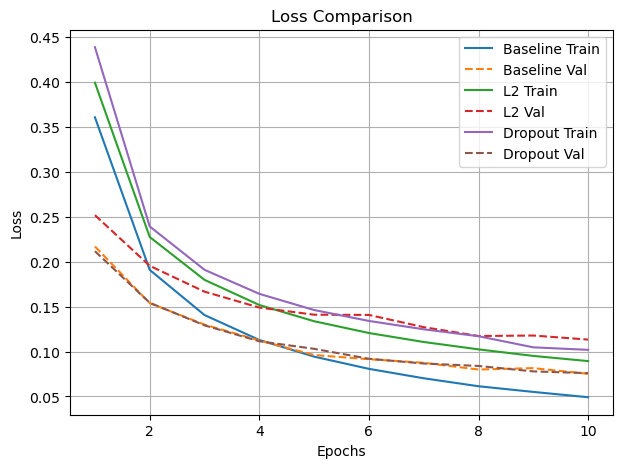

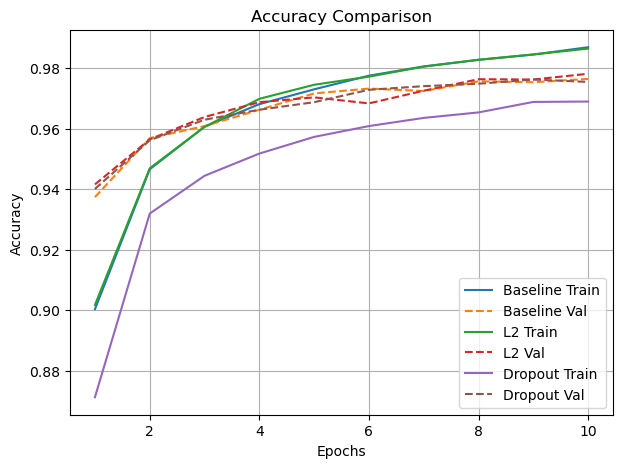

In [1]:
# ------------------------------------------------------------
# MNIST Neural Network Comparison (TensorFlow + Local Dataset)
# ------------------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import os
import numpy as np

print("✅ TensorFlow version:", tf.__version__)

# ------------------------------------------------------------
# 1️⃣ Load MNIST Dataset (Offline from Jupyter Home)
# ------------------------------------------------------------
local_path = "mnist.npz"  # keep mnist.npz file in same directory

if os.path.exists(local_path):
    print(f"\n📂 Loading MNIST dataset from local file: {local_path}")
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data(path=local_path)
else:
    raise FileNotFoundError(f"❌ Could not find {local_path}. Place your dataset file in this directory.")

# Normalize and Flatten
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

print("✅ Data Loaded and Normalized.")
print("Training shape:", X_train.shape, "Testing shape:", X_test.shape)

# ------------------------------------------------------------
# 2️⃣ Define Model Builder Function
# ------------------------------------------------------------
def build_model(dropout=False, l2_reg=False):
    model = keras.Sequential()
    if l2_reg:
        model.add(layers.Dense(256, activation='relu', input_shape=(784,),
                               kernel_regularizer=regularizers.l2(1e-4)))#regulariztion strength lambda
    else:
        model.add(layers.Dense(256, activation='relu', input_shape=(784,)))
    
    if dropout:
        model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(10, activation='softmax'))
    return model

# ------------------------------------------------------------
# 3️⃣ Train + Evaluate Function
# ------------------------------------------------------------
def train_and_evaluate(model, optimizer, epochs=10, batch_size=64):
    model.compile(optimizer=optimizer,#updates wirgthd and gradoents
                  loss='sparse_categorical_crossentropy',#appropriate lABELS for multiclass classificatoon
                  metrics=['accuracy'])
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1#print curve,progress line
    )
    
    return (history.history['loss'], history.history['val_loss'],
            history.history['accuracy'], history.history['val_accuracy'])

# ------------------------------------------------------------
# 4️⃣ Train Three Models (Baseline, L2, Dropout)
# ------------------------------------------------------------
results = {}

print("\n🔹 Training Baseline Model...")
baseline_model = build_model()
optimizer = keras.optimizers.SGD(learning_rate=0.1)#optimiztion tech to reduce loss function
results["Baseline"] = train_and_evaluate(baseline_model, optimizer)

print("\n🔸 Training Model with L2 Regularization...")
l2_model = build_model(l2_reg=True)
optimizer_l2 = keras.optimizers.SGD(learning_rate=0.1)
results["L2"] = train_and_evaluate(l2_model, optimizer_l2)

print("\n🔻 Training Model with Dropout...")
dropout_model = build_model(dropout=True)
optimizer_dropout = keras.optimizers.SGD(learning_rate=0.1)
results["Dropout"] = train_and_evaluate(dropout_model, optimizer_dropout)

print("\n✅ Training complete for all models!")

# ------------------------------------------------------------
# 5️⃣ Plot Results (Loss & Accuracy)
# ------------------------------------------------------------
epochs = range(1, 11)

def plot_metric(index, title, ylabel):
    plt.figure(figsize=(7, 5))
    for lbl, (train_loss, val_loss, train_acc, val_acc) in results.items():
        if index == 0:
            plt.plot(epochs, train_loss, label=f"{lbl} Train")
            plt.plot(epochs, val_loss, label=f"{lbl} Val", linestyle='--')
        else:
            plt.plot(epochs, train_acc, label=f"{lbl} Train")
            plt.plot(epochs, val_acc, label=f"{lbl} Val", linestyle='--')
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()

plot_metric(0, "Loss Comparison", "Loss")
plot_metric(1, "Accuracy Comparison", "Accuracy")
